<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E6%95%99%E5%B8%AB%E3%81%AA%E3%81%97%E5%AD%A6%E7%BF%92_%E6%BC%94%E7%BF%92%E5%95%8F%E9%A1%8C_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# クラスタリングの演習問題

In [ ]:
# こちらのセルを実行してください。
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
from sklearn import cluster,preprocessing
import seaborn as sns

In [ ]:
# 練習問題(1)
import random
import numpy as np

x1 = []
x2 = []

x1.extend(np.random.normal(50, 20, 30))
x2.extend(np.random.normal(150, 20, 30))

x1.extend(np.random.normal(175, 20, 20))
x2.extend(np.random.normal(75, 20, 20))

x1.extend(np.random.normal(75, 20, 40))
x2.extend(np.random.normal(115, 20, 40))

df = pd.DataFrame({'x1':x1, 'x2':x2 })
df

In [ ]:
# 練習問題(2)
df.describe()

In [ ]:
# 練習問題(3)
plt.scatter(x1, x2)
plt.show()

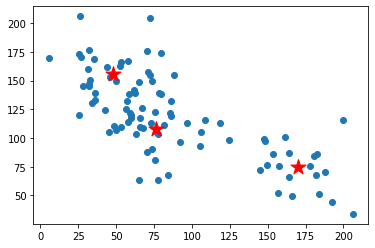

In [ ]:
# 練習問題(4)
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0, init='random')
z = model.fit(df)

plt.scatter(x1, x2)
plt.scatter(z.cluster_centers_[:,0], z.cluster_centers_[:,1], s=250, marker='*', c='red')
plt.show()

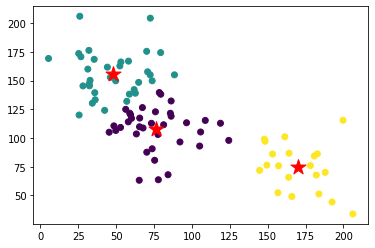

In [ ]:
# 練習問題(5)
plt.scatter(x1,x2,c=z.labels_)
plt.scatter(z.cluster_centers_[:,0], z.cluster_centers_[:,1], s=250, marker='*', c='red')
plt.show()

In [ ]:
# 練習問題(6)
result = model.predict(df)
print(result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [ ]:
# 練習問題(7)
cluster_center = pd.DataFrame(model.cluster_centers_)
display(cluster_center)

,0,1
0,76.141920,107.876940
1,47.590360,155.582129
2,170.338603,74.544552


# 主成分分析の演習問題

In [ ]:
# こちらのセルを実行してください。
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
from sklearn import cluster,preprocessing
import seaborn as sns

In [ ]:
# 練習問題(1)
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
x10 = []

x1.extend(np.random.normal(3, 2, 150))
x2.extend(np.random.normal(5, 2, 150))
x3.extend(np.random.normal(15, 5, 150))
x4.extend(np.random.normal(100, 10, 150))
x5.extend(np.random.normal(3, 2, 150))
x6.extend(np.random.normal(3, 2, 150))
x7.extend(np.random.normal(1, 0.5, 150))
x8.extend(np.random.normal(3, 1.5, 150))
x9.extend(np.random.normal(5, 2, 150))
x10.extend(np.random.normal(3, 1, 150))

df = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'x7':x7,'x8':x8,'x9':x9,'x10':x10})
df

In [ ]:
# 練習問題(2)
df.describe()

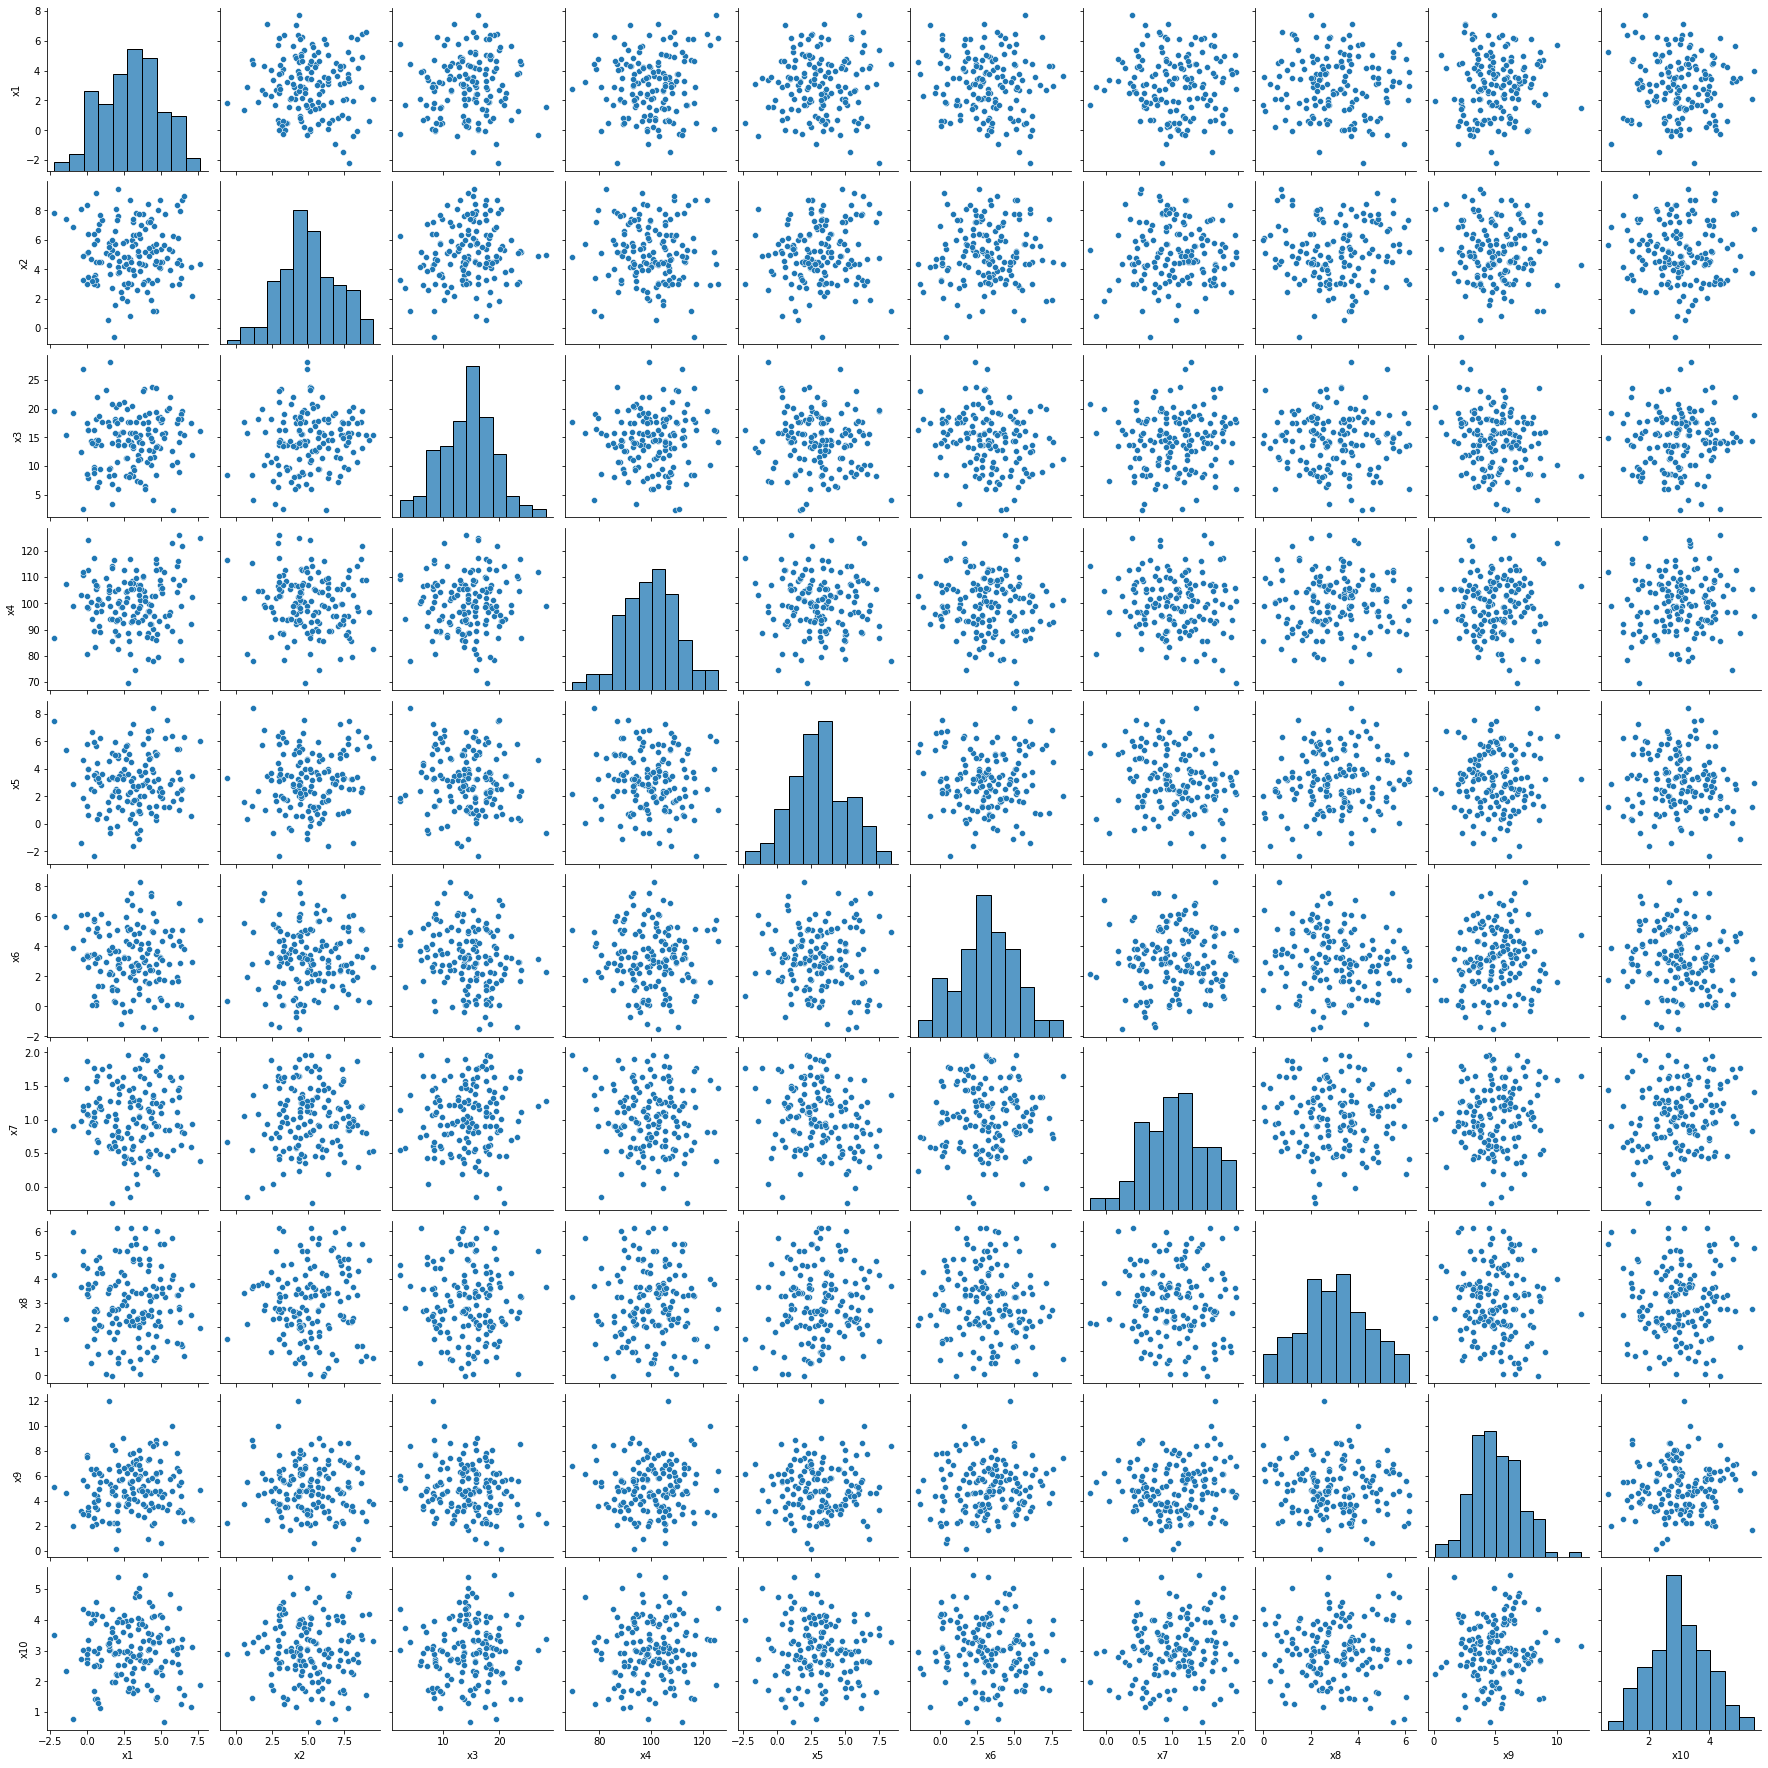

In [ ]:
# 練習問題(3)
import seaborn as sns

sns.pairplot(data=df)

In [ ]:
# 練習問題(4)
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

sc = preprocessing.StandardScaler()
X = df.iloc[:, 0:]
X_norm = sc.fit_transform(X)

pca = PCA(random_state=0)
X_pc = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(X_pc, columns=['PCA{}'.format(i+1) for i in range(len(X_pc[0]))])

print('PCA Number:', pca.n_components_)
print('Keep Information:', round(np.sum(pca.explained_variance_ratio_), 2))
display(df_pca.head())


PCA Number: 10
Keep Information: 1.0


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.707019,0.775373,2.281297,0.860710,0.405207,-1.087015,0.847595,0.565844,-0.673951,-0.035894
1,0.364828,-1.277299,-1.096157,-1.890233,-0.247021,2.603555,-0.414413,-1.296155,-0.325879,-0.434744
2,-0.641141,-0.828458,-0.286882,0.275424,0.724833,0.241308,0.025153,-0.692974,-0.796472,-1.038270
3,-0.048552,0.689308,1.809515,0.717143,0.304353,0.054381,1.206783,0.645450,-1.538110,-0.202529
4,-0.686808,-1.672353,0.599953,1.560523,-2.110546,0.240414,0.201969,-0.823986,-0.160631,0.921715


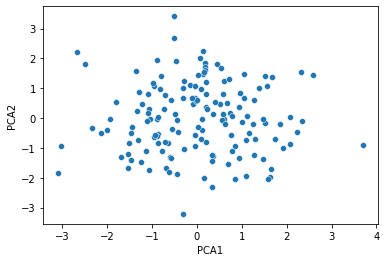

In [ ]:
# 練習問題(5)
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca)


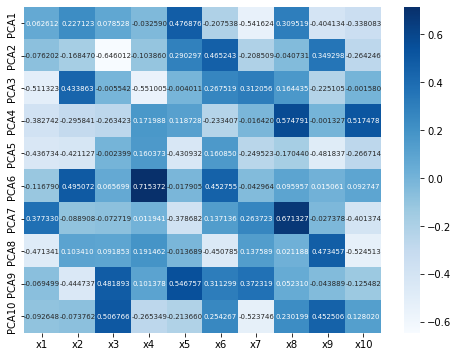

In [ ]:
# 練習問題(6)
import seaborn as sns
fig = plt.figure(figsize=(8,6))

sns.heatmap(pca.components_, cmap="Blues", annot=True, annot_kws={'size':7}, fmt='2f',
            xticklabels=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"],
            yticklabels=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10",])
plt.show()